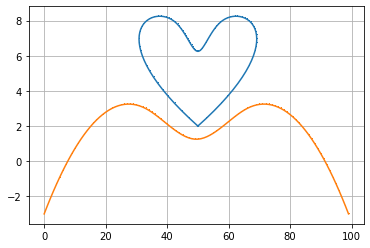

In [3]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
import scipy.interpolate as si 

#Points to draw two classes
x = [6, -2, 4, 6, 8, 14, 6]
y = [-3, 2, 5, 0, 5, 2, -3]

#Store the maximum and minimum point
xmin, xmax = min(x), max(x) 
ymin, ymax = min(y), max(y)

#Define spline for each class
n = len(x)
plotpoints = 100

k = 3
knotspace = range(n)
knots = si.InterpolatedUnivariateSpline(knotspace, knotspace, k=k).get_knots()
knots_full = np.concatenate(([knots[0]]*k, knots, [knots[-1]]*k))

tckX = knots_full, x, k
tckY = knots_full, y, k

splineX = si.UnivariateSpline._from_tck(tckX)
splineY = si.UnivariateSpline._from_tck(tckY)

tP = np.linspace(knotspace[0], knotspace[-1], plotpoints)
xP = splineX(tP)
yP = splineY(tP)

#Plot Each class
grid()
plt.plot(4*xP+26, yP+5, marker = ',')
plt.plot(yP, marker = ',')

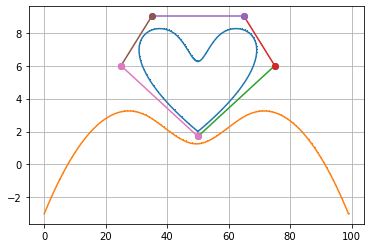

In [4]:
#Consider the first separation line goes through [50,1.7] and [75,6] for the first perceptron
l1x1, l1x2 = [50, 75], [1.7, 6]

#Consider the second separation line goes through [75,65] and [6,9] for the second perceptron
l2x1, l2x2 = [75, 65], [6, 9]

#Consider the third separation line goes through [65,9] and [35,9] for the first perceptron
l3x1, l3x2 = [65, 35], [9, 9]

#Consider the fourth separation line goes through [35,9] and [25,6] for the second perceptron
l4x1, l4x2 = [35, 25], [9, 6]

#Consider the fifth separation line goes through [25,6] and [50,1.7] for the second perceptron
l5x1, l5x2 = [25, 50], [6, 1.7]

grid()

#Plot each class
plt.plot(4*xP+26, yP+5, marker = ',')
plt.plot(yP, marker = ',')

#Plot the separation Lines 
plt.plot(l1x1, l1x2, marker = 'o')
plt.plot(l2x1, l2x2, marker = 'o')
plt.plot(l3x1, l3x2, marker = 'o')
plt.plot(l4x1, l4x2, marker = 'o')
plt.plot(l5x1, l5x2, marker = 'o')

In [5]:
slopes = [] 
weights = np.array([])

#Random point from Class 1 to correct the weight vector
point_from_class_1 = np.array([4,50,1])

#Collect x part of all points
p_x = np.concatenate((l1x1, l2x1,l3x1,l4x1,l5x1))
#Collect y part of all points
p_y = np.concatenate((l1x2, l2x2,l3x2,l4x2,l5x2))

#Store points as X,y
points = np.stack((p_x, p_y), axis=1)
#Combine each two points for the same line
line = points.reshape(5,2,2)

#Calculate Slopes of each line as (y1-y0)/(x1-x0)
for i in range(0,line.shape[0]):
    slopes.append(((line[i][0][1]-line[i][1][1])/(line[i][0][0]-line[i][1][0])))
    
#Print each line slope
print(slopes)

#Calculate weight vector as y(wy)+x(wx)+Wo : wy = 1, wx = -slope, wo = s(xo)-(yo) 
for i in range (0,line.shape[0]):
    weights = np.append(weights,[1,-slopes[i],slopes[i]*line[i][0][0]-line[i][0][1]])

#Reshape weight vector as [wy , wx , wo]
weights = weights.reshape(5,3)

#Correction of the sign of each weight vector (make all weight vectors point to the positive side)
for i in range (0,weights.shape[0]):
    print(weights[i].dot(point_from_class_1.reshape(3,1)))
    if weights[i].dot(point_from_class_1.reshape(3,1)) < 0:
        weights[i] = weights[i]*(-1)
    
print(weights)

[0.172, -0.3, 0.0, 0.3, -0.172]
[2.3]
[-9.5]
[-5.]
[-9.5]
[2.3]
[[  1.     -0.172   6.9  ]
 [ -1.     -0.3    28.5  ]
 [ -1.      0.      9.   ]
 [ -1.      0.3    -1.5  ]
 [  1.      0.172 -10.3  ]]


[[ 3.  9.  1.]
 [-1. 28.  1.]
 [-1. 27.  1.]
 [ 6. 31.  1.]
 [ 2. 21.  1.]
 [ 4. 84.  1.]
 [ 1. 77.  1.]
 [ 0. 33.  1.]
 [ 7. 84.  1.]
 [ 5.  9.  1.]
 [ 3. 19.  1.]
 [ 1. 37.  1.]
 [ 3. 85.  1.]
 [ 6. 11.  1.]
 [ 4. 44.  1.]
 [ 3. 62.  1.]
 [ 5. 97.  1.]
 [ 4.  1.  1.]
 [ 0. 73.  1.]
 [ 6. 43.  1.]]


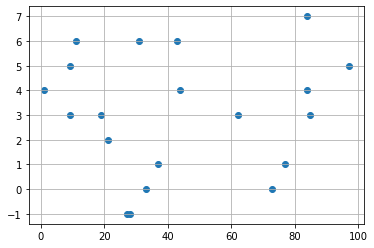

In [6]:
#Create random points inside range of each class for testing
x = np.random.randint(0, 100, 20)
y = np.random.randint(-2, 10, 20)
ones = np.ones(20)

#Join x, y, and ones
test_points = np.stack((y, x, ones), axis=1)

#Reshape each point as [y,x,1]
test_points = test_points.reshape(20,3)
print(test_points)

#Plot the testing points
plt.scatter(x, y)
grid()
plt.show()

In [7]:
results = np.array([])
class_results = np.array([])
hidden_layer_decision = np.array([])

#Calculate the hidden layer decision by multiplying each weight vector by each testing point
for j in range (0,test_points.shape[0]):
    for i in range (0,weights.shape[0]):
        results = np.append(results,[weights[i].dot(test_points[j])])

#Calculate the step function for each decision
for i in range (0,results.size):
    hidden_layer_decision = np.append(hidden_layer_decision,[np.heaviside(results[i],0)])
    
#Join the decision of the five perceptron for each point 
hidden_layer_decision = hidden_layer_decision.reshape(20,5)
print(hidden_layer_decision)

#Calculate the output layer decision
for i in range(0,hidden_layer_decision.shape[0]):
    class_results = np.append(class_results,[np.heaviside(np.sum(hidden_layer_decision[i])-4.5,0)])

[[1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [8]:
color_results = [None]*test_points.shape[0]

print(class_results)
#Count number of points belonging to class 0
print("Number of points belong to C0 : ", np.count_nonzero(class_results == 0))
#Count number of points belonging to class 1
print("Number of points belong to C1 : ", np.count_nonzero(class_results == 1))

#Print each point class and construct color list to plot them
for i in range(0, test_points.shape[0]):
    print("point#",'{: ^3}'.format(i+1), "(",'{: ^3}'.format(x[i]),",",'{: ^3}'.format(y[i]),")","----------> Class",int(class_results[i]))
    if class_results[i] == 1:
        color_results[i] = 'r'
    elif class_results[i] == 0:
        color_results[i]= 'g'

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
Number of points belong to C0 :  17
Number of points belong to C1 :  3
point#  1  (  9  ,  3  ) ----------> Class 0
point#  2  ( 28  , -1  ) ----------> Class 0
point#  3  ( 27  , -1  ) ----------> Class 0
point#  4  ( 31  ,  6  ) ----------> Class 1
point#  5  ( 21  ,  2  ) ----------> Class 0
point#  6  ( 84  ,  4  ) ----------> Class 0
point#  7  ( 77  ,  1  ) ----------> Class 0
point#  8  ( 33  ,  0  ) ----------> Class 0
point#  9  ( 84  ,  7  ) ----------> Class 0
point# 10  (  9  ,  5  ) ----------> Class 0
point# 11  ( 19  ,  3  ) ----------> Class 0
point# 12  ( 37  ,  1  ) ----------> Class 0
point# 13  ( 85  ,  3  ) ----------> Class 0
point# 14  ( 11  ,  6  ) ----------> Class 0
point# 15  ( 44  ,  4  ) ----------> Class 1
point# 16  ( 62  ,  3  ) ----------> Class 0
point# 17  ( 97  ,  5  ) ----------> Class 0
point# 18  (  1  ,  4  ) ----------> Class 0
point# 19  ( 73  ,  0  ) ----------> Class 0
point# 20  (

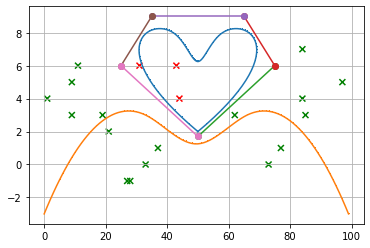

In [9]:
grid()

#Plot each class
plt.plot(4*xP+26, yP+5, marker = ',')
plt.plot(yP, marker = ',')

#Plot the separation Lines 
plt.plot(l1x1, l1x2, marker = 'o')
plt.plot(l2x1, l2x2, marker = 'o')
plt.plot(l3x1, l3x2, marker = 'o')
plt.plot(l4x1, l4x2, marker = 'o')
plt.plot(l5x1, l5x2, marker = 'o')

#Plot the testing points after classification using different colos
plt.scatter(x, y,marker='x', c=color_results)
plt.show()